<a href="https://colab.research.google.com/github/Saul-Ochoa/REDESNEURONALPYTHON/blob/main/NY_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NY Stock Price Prediction**

In [242]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
import pandas as pd
import time
import warnings
import sklearn.preprocessing
valid_set_size_percentage = 10
test_set_size_percentage = 10


In [243]:
data='/content/drive/MyDrive/Redes Neuronales/prices-split-adjusted.csv'
df=pd.read_csv(data)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [245]:
df.shape

(851264, 7)

In [246]:
df['symbol'].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [247]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


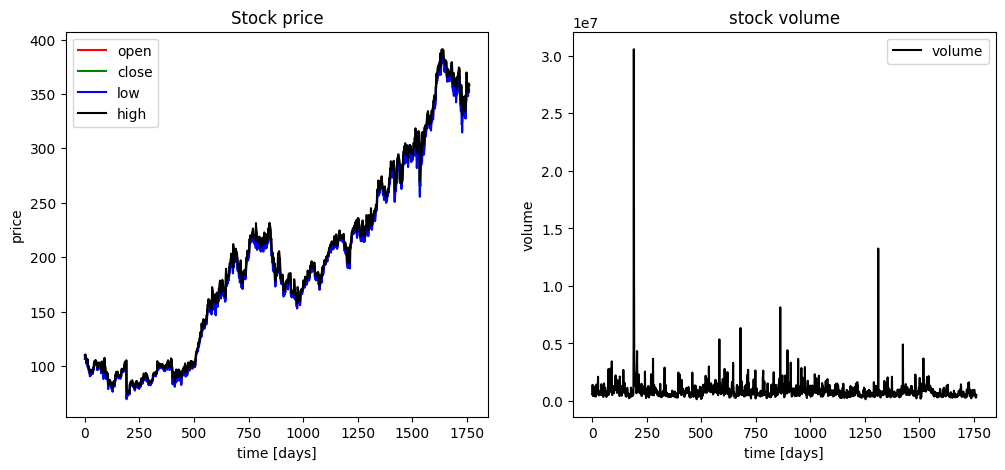

In [248]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(df[df['symbol']=='EQIX'].open.values,color='red',label='open')
plt.plot(df[df['symbol']=='EQIX'].close.values,color='green',label='close')
plt.plot(df[df['symbol']=='EQIX'].low.values,color='blue',label='low')
plt.plot(df[df['symbol']=='EQIX'].high.values,color='black',label='high')
plt.title('Stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

plt.subplot(1,2,2);
plt.plot(df[df['symbol'] == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')
plt.show()

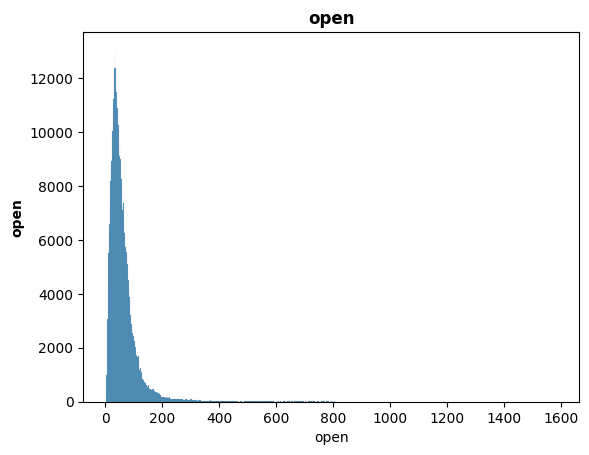

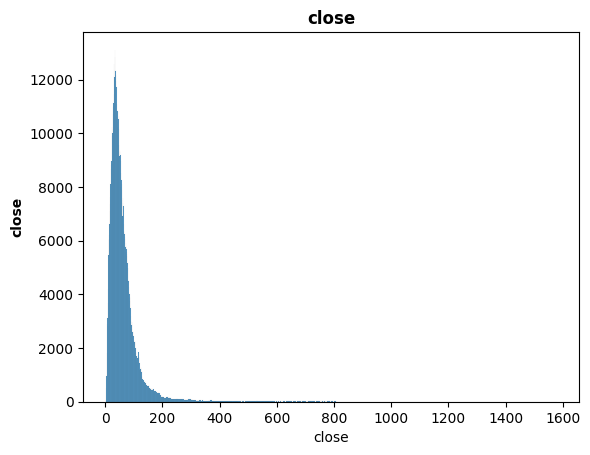

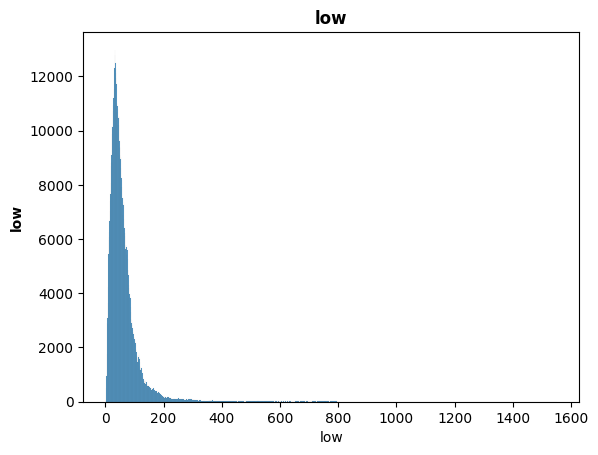

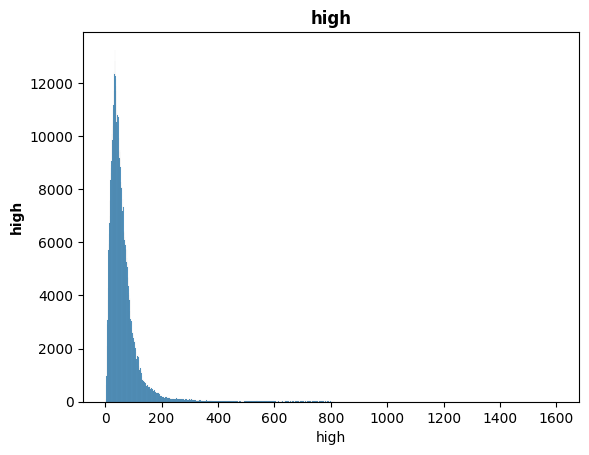

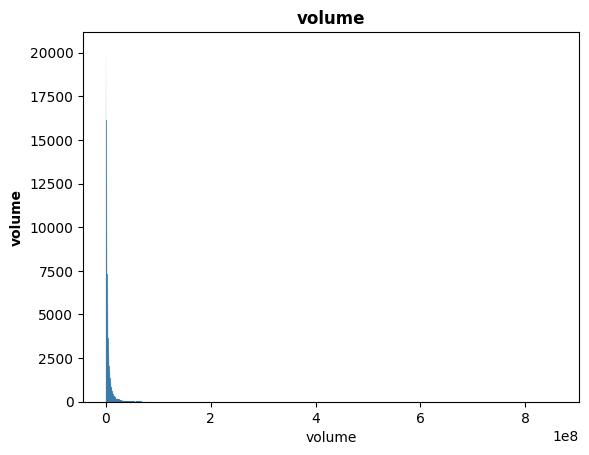

In [249]:
num=['open', 'close', 'low', 'high', 'volume']
for i in num:
  sns.histplot(df[i])
  plt.title(i,fontsize=12,weight='bold')
  plt.ylabel(i,fontsize=10,weight='bold')
  plt.show()

In [250]:
def normalize(df):
  scaler=sklearn.preprocessing.MinMaxScaler()
  df['open']=scaler.fit_transform(df['open'].values.reshape(-1,1))
  df['high']=scaler.fit_transform(df['high'].values.reshape(-1,1))
  df['low']=scaler.fit_transform(df['low'].values.reshape(-1,1))
  df['close']=scaler.fit_transform(df['close'].values.reshape(-1,1))
  return df

In [251]:
df_stock=df[df['symbol']=='EQIX'].copy()
df_stock.drop(['symbol'],axis=1,inplace=True)
df_stock.drop(['volume'],axis=1,inplace=True)

In [252]:
df_stock.head()

,date,open,close,low,high
399,2010-01-04,106.519997,109.559998,106.510002,109.620003
867,2010-01-05,109.589996,108.540001,108.379997,109.589996
1335,2010-01-06,108.949997,109.529999,108.220001,110.570000
1803,2010-01-07,109.250000,107.290001,106.639999,110.349998
2271,2010-01-08,106.800003,106.769997,105.900002,107.279999


In [253]:
cols=list(df_stock.columns.values)
print('df_stock.columns.values =', cols)

df_stock_norm=df_stock.copy()
df_stock_norm=normalize(df_stock_norm)

df_stock.columns.values = ['date', 'open', 'close', 'low', 'high']


In [254]:
df_stock_norm['date'] = pd.to_datetime(df_stock_norm['date'], format='%Y-%m-%d')
df_stock_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 399 to 850919
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1762 non-null   datetime64[ns]
 1   open    1762 non-null   float64       
 2   close   1762 non-null   float64       
 3   low     1762 non-null   float64       
 4   high    1762 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 82.6 KB


In [255]:
# Encuentra la fecha de referencia (la fecha mínima en tus datos)
fecha_de_referencia = df_stock_norm['date'].min()

# Calcula el número de días transcurridos desde la fecha de referencia
df_stock_norm['days_since_reference'] = (df_stock_norm['date'] - fecha_de_referencia).dt.days

# Ahora, df_stock_norm contiene una nueva columna 'days_since_reference' que tiene los días transcurridos como valores numéricos
# Puedes usar 'days_since_reference' como entrada para tu modelo

In [256]:
df_stock_norm.drop(['date'],axis=1,inplace=True)

* Sí, puedes utilizar train_test_split de la biblioteca sklearn.model_selection para dividir tus datos en conjuntos de entrenamiento y prueba, lo cual es una opción común en el aprendizaje automático. Sin embargo, en tu caso, parece que estás tratando de crear secuencias de datos para su uso en un modelo de serie temporal. train_test_split no es específicamente adecuado para este propósito, ya que simplemente dividirá los datos en conjuntos aleatorios sin tener en cuenta la estructura de series temporales.

* Si estás trabajando con datos de series temporales y deseas crear secuencias de entrenamiento y prueba en función del orden temporal de los datos, entonces la función load_data que has implementado parece más apropiada.

* Sin embargo, si estás en una situación en la que no es necesario mantener el orden temporal de los datos y simplemente deseas dividirlos en conjuntos de entrenamiento y prueba de manera aleatoria, entonces train_test_split podría ser una opción adecuada. En este caso, tendrías que convertir tu DataFrame en una matriz numpy antes de usar train_test_split de la siguiente manera:

In [258]:
# Supongamos que tienes un DataFrame llamado df con la columna "days_since_reference"
# Cambia el nombre de la columna "days_since_reference" a "date"
df_stock_norm.rename(columns={'days_since_reference': 'date'}, inplace=True)

# Obtiene una lista de las columnas originales
columnas_originales = df_stock_norm.columns.tolist()

# Define el nuevo orden de las columnas
nuevo_orden = ['date'] + [col for col in columnas_originales if col != 'date']

# Reorganiza las columnas del DataFrame
df_stock_norm = df_stock_norm[nuevo_orden]
df_stock_norm.head()

,date,open,close,low,high
399,0,0.109250,0.122904,0.117440,0.110911
867,1,0.118896,0.119708,0.123361,0.110816
1335,2,0.116886,0.122810,0.122855,0.113912
1803,3,0.117828,0.115791,0.117852,0.113217
2271,4,0.110130,0.114161,0.115509,0.103519


In [272]:
df_stock_norm.drop('date',axis=1,inplace=True)

In [273]:
df_stock_norm

,open,close,low,high
399,0.109250,0.122904,0.117440,0.110911
867,0.118896,0.119708,0.123361,0.110816
1335,0.116886,0.122810,0.122855,0.113912
1803,0.117828,0.115791,0.117852,0.113217
2271,0.110130,0.114161,0.115509,0.103519
...,...,...,...,...
848919,0.880884,0.897089,0.889589,0.895976
849419,0.895588,0.897433,0.904598,0.900745
849919,0.896971,0.888471,0.899278,0.900430
850419,0.885031,0.898593,0.894402,0.898471


## Predicciones con Tensorflow

In [274]:
# create train and test data validation
def load_data(stock, seq_len, valid_set_size_percentage, test_set_size_percentage):
    data_raw = stock.values  # Utiliza el atributo 'values' para obtener un array numpy
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])

    data = np.array(data)
    valid_set_size = int(np.round(valid_set_size_percentage / 100 * data.shape[0]))
    test_set_size = int(np.round(test_set_size_percentage / 100 * data.shape[0]))
    train_set_size = data.shape[0] - (valid_set_size + test_set_size)

    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]

    x_valid = data[train_set_size:train_set_size + valid_set_size, :-1, :]
    y_valid = data[train_set_size:train_set_size + valid_set_size, -1, :]

    x_test = data[train_set_size + valid_set_size:, :-1, :]
    y_test = data[train_set_size + valid_set_size:, -1, :]

    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

seq_len = 20
valid_set_size_percentage = 10
test_set_size_percentage = 10
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len, valid_set_size_percentage, test_set_size_percentage)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ', x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)


x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


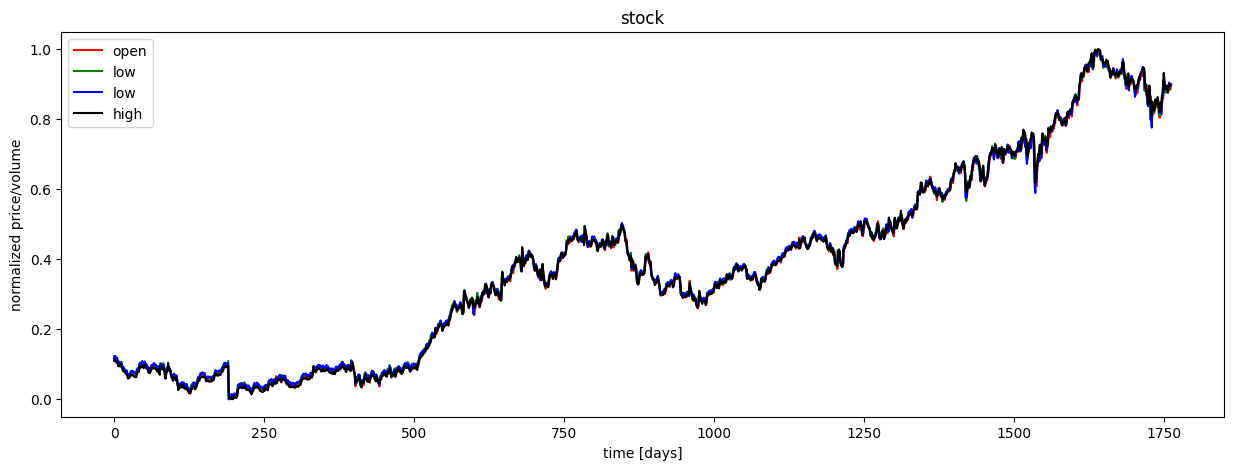

In [275]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [276]:
fig = px.line(df_stock_norm, x=df_stock_norm.index, y=['open', 'close', 'low', 'high'],
              labels={'variable': 'Price Type', 'value': 'Normalized Price'},
              title='Stock Prices Over Time',
              width=1000, height=500)
fig.update_xaxes(title_text='Time [days]')
fig.update_yaxes(title_text='Normalized Price/Volume')
fig.show()

In [277]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Función para obtener el siguiente lote de datos de entrenamiento
index_in_epoch = 0
perm_array = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size

    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array)  # Baraja la matriz de permutación
        start = 0  # Comienza la siguiente época
        index_in_epoch = batch_size

    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# Parámetros
n_steps = seq_len - 1
n_inputs = 4
n_neurons = 200
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# Use SimpleRNN layers in Keras
layers = [tf.keras.layers.SimpleRNN(units=n_neurons, activation='relu', return_sequences=True)
          for _ in range(n_layers)]

# Create a stacked RNN model using Keras Sequential
model = keras.Sequential(layers)

# Connect the model to the input data
rnn_outputs = model(X)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
dense_layer = keras.layers.Dense(n_outputs, activation=None)
stacked_outputs = dense_layer(stacked_rnn_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:, n_steps - 1, :]

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

# Ejecuta el gráfico
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for iteration in range(int(n_epochs * train_set_size / batch_size)):
        x_batch, y_batch = get_next_batch(batch_size)
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch})
        if iteration % int(5 * train_set_size / batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train})
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid})
            print('%.2f epochs: MSE train/valid = %.6f/%.6f' % (
                iteration * batch_size / train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})


0.00 epochs: MSE train/valid = 0.052390/0.241769
4.99 epochs: MSE train/valid = 0.000106/0.000376
9.97 epochs: MSE train/valid = 0.000135/0.000560
14.96 epochs: MSE train/valid = 0.000067/0.000206
19.94 epochs: MSE train/valid = 0.000090/0.000327
24.93 epochs: MSE train/valid = 0.000103/0.000344
29.91 epochs: MSE train/valid = 0.000161/0.000526
34.90 epochs: MSE train/valid = 0.000064/0.000206
39.89 epochs: MSE train/valid = 0.000081/0.000270
44.87 epochs: MSE train/valid = 0.000072/0.000263
49.86 epochs: MSE train/valid = 0.000063/0.000195
54.84 epochs: MSE train/valid = 0.000065/0.000216
59.83 epochs: MSE train/valid = 0.000115/0.000430
64.81 epochs: MSE train/valid = 0.000062/0.000185
69.80 epochs: MSE train/valid = 0.000058/0.000183
74.78 epochs: MSE train/valid = 0.000059/0.000167
79.77 epochs: MSE train/valid = 0.000070/0.000221
84.76 epochs: MSE train/valid = 0.000059/0.000184
89.74 epochs: MSE train/valid = 0.000064/0.000227
94.73 epochs: MSE train/valid = 0.000057/0.000188
99.

In [278]:
y_train.shape

(1394, 4)

correct sign prediction for close - open price for train/valid/test: 0.57/0.36/0.39


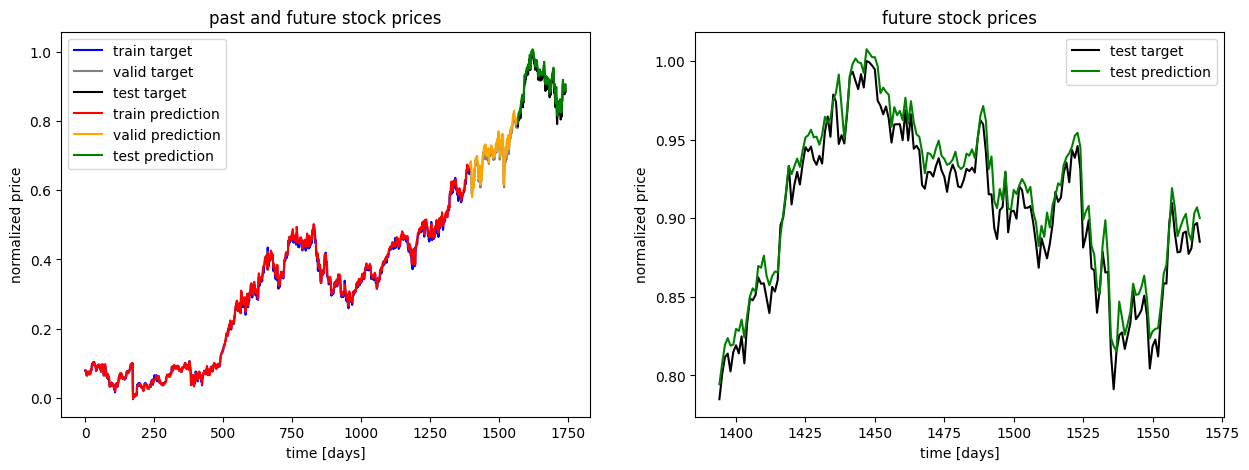

In [279]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

In [281]:
# Create a DataFrame for visualization
data = pd.DataFrame({
    'Time': np.arange(y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]),
    'Target': np.concatenate([y_train[:, ft], y_valid[:, ft], y_test[:, ft]]),
    'Prediction': np.concatenate([y_train_pred[:, ft], y_valid_pred[:, ft], y_test_pred[:, ft]]),
    'Dataset': np.concatenate([
        np.full(y_train.shape[0], 'Train'),
        np.full(y_valid.shape[0], 'Valid'),
        np.full(y_test.shape[0], 'Test')
    ])
})

# Create interactive line plot
fig = px.line(data, x='Time', y=['Target', 'Prediction'],
              color='Dataset', labels={'value': 'Normalized Price'},
              title='Stock Price Prediction')

# Add legend and customize layout
fig.update_traces(mode='lines', hovertemplate=None)
fig.update_layout(legend_title_text='Dataset', xaxis_title='Time [days]',
                  yaxis_title='Normalized Price')

# Show the plot
fig.show()

# Calculate correct sign prediction
corr_price_development_train = np.sum(np.equal(np.sign(y_train[:, 1] - y_train[:, 0]),
                                               np.sign(y_train_pred[:, 1] - y_train_pred[:, 0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:, 1] - y_valid[:, 0]),
                                               np.sign(y_valid_pred[:, 1] - y_valid_pred[:, 0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:, 1] - y_test[:, 0]),
                                              np.sign(y_test_pred[:, 1] - y_test_pred[:, 0])).astype(int)) / y_test.shape[0]

print('Correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f' % (
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))


Correct sign prediction for close - open price for train/valid/test: 0.57/0.36/0.39


In [282]:
data

,Time,Target,Prediction,Dataset
0,0,0.078364,0.080067,Train
1,1,0.075913,0.077984,Train
2,2,0.077829,0.078949,Train
3,3,0.074090,0.076733,Train
4,4,0.066392,0.066052,Train
...,...,...,...,...
1737,1737,0.877302,0.890500,Test
1738,1738,0.880884,0.885752,Test
1739,1739,0.895588,0.902987,Test
1740,1740,0.896971,0.906947,Test
